In [1]:
import math

## Permutations

In [120]:
class Solution(object):
    
    def permute(self, nums):
        ans=[]
        self.return_num(nums,[],ans)
        return ans
        
    
    def return_num(self, n, a, ans):
        if not n:
            return ans.append(a)
        for i in range(len(n)):
            self.return_num(n[:i]+n[i+1:], a+[n[i]], ans)
        return

In [121]:
Solution().permute([1,2,3])

[[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]

## Range Sum of BST

In [54]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        
class Solution(object):

    def rangeSumBST(self, root, L, R):
        global s
        s=0
        self.get_sum(root,L,R)
        return s
    
    def get_sum(self, root, L, R):
        if root:
            global s
            self.get_sum(root.left,L,R)
            self.get_sum(root.right,L,R)
            if root.val>=L and root.val<=R:
                s+=root.val
            return
        return

In [55]:
r=TreeNode(10)
r.left=TreeNode(5)
r.right=TreeNode(15)
r.left.left=TreeNode(3)
r.left.right=TreeNode(7)
r.right.right=TreeNode(18)

Solution().rangeSumBST(r,7,15)

10 0
5 0
3 0
7 0
15 7
18 7


32

## Non Decreasing Array

In [118]:
class Solution(object):
    def checkPossibility(self, nums):
        if len(nums)==1:
            return True
        for i in range(1,len(nums)):
            if nums[i]<nums[i-1]:
                t=nums[i-1]
                nums[i-1]=nums[i]
                if self.issorted(nums):
                    return True
                else:
                    nums[i-1]=t
                    if i<len(nums)-1:
                        t=nums[i]
                        nums[i]=nums[i+1]
                        if self.issorted(nums):
                            return True
                    else:
                        return True
                    return False
        return True
    
    def issorted(self,n):
        print(n)
        for i in range(1,len(n)):
            if n[i]<n[i-1]:
                return False
        return True

In [119]:
n=[1,2,4,5,3]
Solution().checkPossibility(n)

[1, 2, 4, 3, 3]


True

# Genospace

In [165]:
def solution(S):
    occurrences = [0] * 26

    for i in range(len(S)):
        occurrences[ord(S[i]) - ord('a')] += 1

    best_char = 'a'
    best_res = 0

    for i in range(26):
        if occurrences[i] > best_res:
            best_char = chr(ord('a') + i)
            best_res = occurrences[i]

    return best_char

In [167]:
solution('zbba')

'b'

In [160]:
ord('a')-ord('a')

0

In [195]:
def solution(S):
    S=S.strip().replace(' ','')

    br={')':'(','}':'{',']':'['}
    opn=[]
    for i in S:
        if i in '({[':
            opn.append(i)
        if i in ')}]':
            if len(opn)==0:
                return False
            elif br[i]!=opn.pop():
                return False
    if len(opn)!=0:
        return False

    return True

In [198]:
s='{ ( [ ([) ] ) }  '
solution(s)

False

## N-th Tribonacci Number

In [216]:
class Solution(object):
    def tribonacci(self, n):
        x=[0,1,1]
        if n>2:
            for i in range(3,n+1):
                x.append(x[i-3]+x[i-2]+x[i-1])
        return x[n]

In [217]:
Solution().tribonacci(3)

2

## Count of Binary Strings

In [326]:
from collections import deque, Counter
class Solution(object):
    def countBinarySubstrings(self, s):
        count=0
        c=deque()
        i=0
        while i<len(s):
            print(s[i],c)
            if c:
                if s[i] in c:
                    c.append(s[i])
                else:
                    while len(c)>0:
                        l=len(c)
                        print(c,'compareto',s[i:i+l])
                        if i+l<=len(s):
                            if c.popleft() not in s[i:i+l]:
                                count+=l
                                print('Found opposite',count)
                                i-=1
            else:
                c.append(s[i])
            i+=1
        return count

In [371]:
class Solution(object):
    def countBinarySubstrings(self, s):
        count=0
        if s:
            i=0
            le=''
            while i<len(s):
                print(s[i],le)
                if le:
                    if s[i] in le:
                        le+=s[i]
                    else:
                        l=len(le)
                        if i+l<=len(s):
                            ri=s[i:i+l]
                            
                            j=0
                            while len(ri)>0:
                                print(le,'compareto',ri)
                                if le[0] not in ri:
                                    count+=min(len(ri),l)
                                    le=''
                                    i-=1
                                    break
                                else:
                                    j+=1
                                    ri=s[i:i+l-j]
                        else:
                            le=le[:len(le)-1]
                            i-=1
                else:
                    le+=s[i]
                i+=1
        return count

In [383]:
class Solution(object):
    def countBinarySubstrings(self, s):
        count=0
        if s:
            s=s.replace('01','0 1').replace('10','1 0')
            n=s.split(' ')
            for i in range(len(n)-1):
                count+=min(len(n[i]),len(n[i+1]))
        return count

In [388]:
s='0001100'
Solution().countBinarySubstrings(s)

4

## Kth Largest Element in an Array

In [448]:
class Solution(object):
    def findKthLargest(self, nums, k):
        nums=sorted(nums,reverse=True)
        return nums[k-1]

In [418]:
class Solution(object):
    def findKthLargest(self, nums, k):
        if nums and k>0 and k<=len(nums):
            ranking=[0]*len(nums)
            print(ranking)
            for i in nums:
                print(i,ranking)
                for j in range(k+1):
                    if ranking[j]<i:
                        t=ranking[j]
                        ranking[j]=i
                        ranking[j+1]=t
                        break
            print(ranking)
            return ranking[k-1]

In [449]:
n=[1,2,3,4,5,6,7,8]
k=4
Solution().findKthLargest(n,k)

5

## Kth Largest Stream

In [471]:
class KthLargest(object):

    def __init__(self, k, nums):
        self.nums=nums
        self.k=k

    def add(self, val):
        self.nums.append(val)
        self.nums=sorted(self.nums, reverse=True)[:self.k]
        return self.nums[-1]

In [476]:
a.add(9)

6

## Heaters



In [27]:
class Solution(object):
    def findRadius(self, houses, heaters):
        diff=[0]
        for i in range(len(heaters)-1):
            diff.append(heaters[i+1]-heaters[i]-1)
        
        between=max(diff)
        edge=max(heaters[0]-1,houses[-1]-heaters[-1])
        # print(between,edge)
        if edge>=between:
            return edge
        else:
            return (between//2 + 1 if between%2!=0 else between//2)

In [100]:
class Solution(object):
    def findRadius(self, houses, heaters):
        rad=0
        for i in range(len(houses)):
            print(rad)
            if houses[i]<heaters[0]:
                rad=max(rad,heaters[0]-houses[i])
            elif houses[i]>heaters[len(heaters)-1]:
                rad=max(rad,houses[i]-heaters[len(heaters)-1])
            else:
                rad=max(rad, self.binrad(heaters,houses[i]))
        return rad
    
    def binrad(self, heat, h):
        lo=0
        hi=len(heat)-1
        
        while lo<=hi:
            mid=lo+((hi-lo+1)//2)
            print(heat[mid],h)
            if h==heat[mid]:
                return 0
            elif h>heat[mid] and h<heat[mid+1]:
                return min(h-heat[mid],heat[mid+1]-h)
            elif h<heat[mid]:
                hi=mid-1
            elif h>heat[mid]:
                lo=mid+1
        return -1
        

In [101]:
n=[1,2,3]
h=[1,2,3]
Solution().findRadius(n,h)

0
2 1
1 1
0
2 2
0
2 3
3 3


0

## Length of Last word

In [135]:
class Solution(object):
    def lengthOfLastWord(self, s):
        if len(s)>0:
            s=s.strip().split(' ')
            return (len(s[-1]) if len(s)>=1 else 0)
        return 0

In [141]:
Solution().lengthOfLastWord('asdassdsd sDada')

6

In [137]:
class Solution(object):
    def lengthOfLastWord(self, s):
        if len(s)>0:
            s=s.strip()
            c=0
            for i in range(len(s)-1,-1,-1):
                c+=1
                if s[i]==' ':
                    return c-1
            return c
        return 0


## Sum of Squares

In [414]:
import math
class Solution(object):
    def judgeSquareSum(self, c):
        if c>1:
            if str(math.sqrt(c)).split('.')[1]=='0':
                    return True
            for i in range(1,int(math.sqrt(c))+1):
                if str(math.sqrt(c-i**2)).split('.')[1]=='0':
                    print(i**2,c-i**2)
                    return True
            return False
        return True


In [416]:
import math
class Solution(object):
    def judgeSquareSum(self, c):
        if c>2:
            l=0
            h=int(math.sqrt(c))+1
            while l<=h:
                print(l,h)
                r=l**2+h**2
                if r==c:
                    return True
                elif r<c:
                    l+=1
                else:
                    h-=1
            return False
        return True



In [417]:
Solution().judgeSquareSum(8)

0 3
0 2
1 2
2 2


True

## Can Place Flowers

In [484]:
class Solution(object):
    def canPlaceFlowers(self, flowerbed, n):
        if n==0:
            return True
        if flowerbed:
            i=1
            d=-100
            if len(flowerbed)>3:
                while i<len(flowerbed)-1:
                    if i-1==0:
                        s=flowerbed[i-1]+flowerbed[i]
                    elif i+1==len(flowerbed)-1:
                        s=flowerbed[i]+flowerbed[i+1]
                    else:
                        s=flowerbed[i-1]+flowerbed[i]+flowerbed[i+1]

                    if s==0 and abs(d-i)!=1:
                        n-=1
                        d=i
                    i+=1

                if n>0:
                    return False
                return True
            else:
                valid=False
                if len(flowerbed)==2 and n>sum(flowerbed):
                    print('w')
                    valid=True
                if len(flowerbed)==3:
                    if sum(flowerbed[:2])<n or sum(flowerbed[1:])<n:
                        valid=True
                if len(flowerbed)==1 and flowerbed[0]<n:
                    valid=True
                return valid
        return False

In [544]:
class Solution(object):
    def canPlaceFlowers(self, flowerbed, n):
        if n==0:
            return True
        if flowerbed:
            f=''.join([str(j) for j in flowerbed])
            f=f.split('1')
            mxc=0
            for i in range(len(f)):
                l=len(f[i])
                if i==0 or i==(len(f)-1):
                    if l>1:
                        if l%2!=0:
                            mxc+=(l//2+1 if l>3 else l//2)
                        else:
                            mxc+=l//2
                    else:
                        mxc+=l
                else:
                    print(f[i])
                    if l>2:
                        if l%2!=0:
                            mxc+=l//2
                        else:
                            mxc+=l//2-1
            print(f,mxc)
            if mxc>=n:
                return True
            return False
        return False

In [545]:
flowerbed = [1,0,0,0,1]
n = 2

Solution().canPlaceFlowers(flowerbed,n)

000
['', '000', ''] 1


False

In [490]:
'00100111000'.split('1')

['00', '00', '', '', '000']

## Walking Robot

In [142]:
class Solution(object):
    def robotSim(self, commands, obstacles):
        curr=[0,0]
        d=[0,1]
        for i in commands:
            if i>0:
                k=0
                while k<i:
                    x=curr[0]+d[0]
                    y=curr[1]+d[1]
                    if [x,y] in obstacles:
                        print(i,'obstacle found',x,y,curr)
                        break
                    else:
                        curr[0]=x
                        curr[1]=y
                    k+=1
                print('curr',curr)
            else:
                if i==-1:
                    if d[0]==1:
                        d=[0,-1]
                    elif d[0]==-1:
                        d=[0,1]
                    elif d[1]==1:
                        d=[1,0]
                    else:
                        d=[-1,0]
                else:
                    if d[0]==1:
                        d=[0,1]
                    elif d[0]==-1:
                        d=[0,-1]
                    elif d[1]==1:
                        d=[-1,0]
                    else:
                        d=[1,0]
        print('final',curr)
        return curr[0]**2+curr[1]**2
                
                            

In [145]:
Solution().robotSim([4,-1,4,-2,-1,-1,-1,4],
                    [[2,4]])

curr [0, 4]
4 obstacle found 2 4 [1, 4]
curr [1, 4]
curr [-3, 4]
final [-3, 4]


25

## First Bad Version

In [119]:
x='gg'
def isBadVersion(i):
    if x[i-1]=='b':
        return True
    return False

In [128]:
class Solution(object):
    def firstBadVersion(self, n):
        l=1
        r=n
        while l<=r-1:
            m= (l+r) //2
            print(l,m,r)
            if isBadVersion(m):
                r=m
            else:
                l=m
            if l==r-1:
                break
        ans=(l if isBadVersion(l) else (m if isBadVersion(m) else r))
        return ans
        

In [129]:
Solution().firstBadVersion(len(x))

1 1 2


2

## Largest Time for given digits

In [310]:
class Solution(object):
    def largestTimeFromDigits(self, A):
        return self.findtime('',A)
        
    def findtime(self,cur,A):
        print(cur,A)
        if len(A)==0:
            if int(cur[:2])<24 and int(cur[3:5])<60:
                return cur
            else:
                return ''
        tim=''
        for i in range(len(A)):
            if len(cur)==2:
                if int(cur)<24:
                    tim=max(self.findtime(cur+':'+str(A[i]),A[:i]+A[i+1:]),tim)
                else:
                    return tim
            else:
                tim=max(self.findtime(cur+str(A[i]),A[:i]+A[i+1:]),tim)
        return tim

In [311]:
A=[1,2,3,4]
Solution().largestTimeFromDigits(A)

 [1, 2, 3, 4]
1 [2, 3, 4]
12 [3, 4]
12:3 [4]
12:34 []
12:4 [3]
12:43 []
13 [2, 4]
13:2 [4]
13:24 []
13:4 [2]
13:42 []
14 [2, 3]
14:2 [3]
14:23 []
14:3 [2]
14:32 []
2 [1, 3, 4]
21 [3, 4]
21:3 [4]
21:34 []
21:4 [3]
21:43 []
23 [1, 4]
23:1 [4]
23:14 []
23:4 [1]
23:41 []
24 [1, 3]
3 [1, 2, 4]
31 [2, 4]
32 [1, 4]
34 [1, 2]
4 [1, 2, 3]
41 [2, 3]
42 [1, 3]
43 [1, 2]


'23:41'

In [312]:
class TreeNode(object):
    def __init__(self, x):
        self.val = x
        self.left = None
        self.right = None
        

In [343]:
from collections import defaultdict
class Solution(object):
    
    def longestUnivaluePath(self, root):
        self.mx=0
        if root:
            d=0
            self.path(root,d)
        return self.mx
    
    def path(self,r,d):
        if r:
            print(d,r.val)
            if r.left and r.right and r.val==r.left.val and r.val==r.right.val:
                d+=2
                
                self.path(r.left,d)
                self.path(r.right,d)
            elif r.right and r.val==r.right.val:
                d+=1
                self.path(r.right,d)
            elif r.left and r.val==r.left.val:
                d+=1
                self.path(r.left,d)
            else:
                d=0
                self.path(r.left,d)
                self.path(r.right,d)
            self.mx=max(self.mx,d)
        return

In [349]:
r=TreeNode(1)
# r.left=TreeNode(5)
r.right=TreeNode(1)
r.right.left=TreeNode(1)
r.right.right=TreeNode(1)
r.right.left.left=TreeNode(1)
r.right.left.right=TreeNode(1)
r.right.left.left.left=TreeNode(1)

Solution().longestUnivaluePath(r)

0 1
1 1
3 1
5 1
6 1
5 1
3 1


6

In [24]:

class Solution(object):
    def validMountainArray(self, A):
        if len(A)<3:
            return False
        m=int(-1e5)
        p=False
        a=False
        for i in range(len(A)-1):
            print(A[i],p)
            if A[i]<A[i+1]:
                if a==False:
                    a=True
                if p:
                    return False
                m=A[i+1]
                
            elif A[i]>A[i+1]:
                if p==False:
                    p=True
            else:
                return False
        return (True if p and a else False)
                
            

In [25]:
Solution().validMountainArray([9,8,7,6,5,4,3,2,1])

9 False
8 True
7 True
6 True
5 True
4 True
3 True
2 True


False

## Maximal Square

In [115]:
class Solution(object):
    def maximalSquare(self, matrix):
        if matrix and len(matrix)>0:
            i=0
            j=0
            sq=0
            maxsq=min(len(matrix[0]),len(matrix))
            nosq=False

            while i<len(matrix):
                j=0
                while j<len(matrix[0]):
                    if matrix[i][j]=='1':
                        for s in range(1,maxsq+1):
                            if self.isvalid(i+s,j+s,matrix):
                                sq=max(sq,self.checksquare(matrix,i,j,s))
                    j+=1
                i+=1
                if sq==maxsq**2:
                    break

            return sq
        return 0
    
    def checksquare(self,m,i,j,s):
        for y in range(i,i+s):
            for x in range(j,j+s):
                if m[y][x]=='0':
                    return 0
        return s**2
    
    def isvalid(self, i, j, m):
        if i<=len(m) and j<=len(m[0]):
            return True
        return False

In [116]:
m=[["1"]]

Solution().maximalSquare(m)

1


1

## Repeated String Match

In [14]:
class Solution(object):
    def repeatedStringMatch(self, A, B):
        a=len(A)
        b=len(B)
        c=1
        if b>a:
            for i in range(1,abs(b-a)):
                if (A*i).count(B)>0:
                    return i
        else:
            if B in A:
                return 1
            elif B in 2*A:
                return 2
            else:
                return -1
        return -1

In [16]:
A="abaa"
B="aaab"

Solution().repeatedStringMatch(A,B)

4 4


2

## Word Search

In [337]:
class Solution(object):
    def exist(self, board, word):
        i=0
        j=0
        while i < len(board):
            j=0
            while j < len(board[0]):
                if board[i][j]==word[0]:
                    nexque=[((i,j),0, set())]
                    while len(nexque)>0:
                        (r,c),w,visited = nexque.pop()
                        if board[r][c]==word[w]:
                            if w==len(word)-1:
                                return True
                            visited.add((r,c))
                            w+=1
                            positions=[(1,0),(0,1),(-1,0),(0,-1)]
                            for p in positions:
                                v=set([(r,c)])
                                if (r+p[0], c+p[1]) not in visited and self.isvalid(board,r+p[0], c+p[1]) and w<=len(word):
                                    nexque.append(((r+p[0], c+p[1]), w, visited | v))
                j+=1
            i+=1
        return False

        
        
    def isvalid(self, board, i, j):
        if (i < len(board) and j<len(board[0]) and i>=0 and j>=0):
            return True
        return False

In [338]:
board =[
  ['A','B','C','D'],
  ['S','F','E','S'],
  ['A','D','E','E']
]
word='ABCDSEEEFS'

Solution().exist(board,word)

True

## X of a kind in Deck of cards

In [423]:
from collections import Counter
class Solution(object):
    def hasGroupsSizeX(self, deck):
        c=Counter(deck)
        x=c[deck[0]]
        n=[]
        for k in c.keys():
            n.append(c[k])
        
        if len(n)==1:
            return (True if n[0]>1 else False)
        
        for j in range(len(n)):
            for k in range(j+1,len(n)):
                if n[j]>=2:
                    if self.check(n[k],n[j])==False:
                        return False
                else:
                    return False
        return True
    
    def check(self, x, y):
        if x==y or x%y==0 or y%x==0:
            return True
        else:
            for d in range(2,min(x,y)//2 + 1):
                if x%d==0 and y%d==0:
                    return True
            return False

In [425]:
deck=[1,1]
Solution().hasGroupsSizeX(deck)

True

In [499]:
class Solution(object):
    def containsNearbyDuplicate(self, nums, k):
        if nums:
            c=dict()
            for i in range(len(nums)):
                if nums[i] in c:
                    p=c[nums[i]]
                    if abs(p-i)<=k:
                        return True
                    c[nums[i]]=i
                else:
                    c[nums[i]]=i
            return False
        return False

In [500]:
n=[1,0,1,1]
Solution().containsNearbyDuplicate(n,1)

True

In [466]:
random.randint(0,len(n))

3

In [485]:
x=defaultdict(int)
print(x[1])

0


## CountMax - MathWorks

In [3]:
def countMax(upRight):
    mxr,mxc=0,0
    for s in upRight:
        r=int(s.split(' ')[0])
        c=int(s.split(' ')[1])
        if r>mxr:
            mxr=r
        if c>mxc:
            mxc=c
    
    sdict=[[0 for i in range(mxc)] for j in range(mxr)]
    mxout=0
    for s in upRight:
        r=int(s.split(' ')[0])
        c=int(s.split(' ')[1])
        for i in range(mxr):
            for j in range(mxc):
                if i<r and j<c:
                    sdict[i][j]+=1
                    mxout+=1
    print(sdict, mxout)
    mxout=0
    mxo=0
    for r in sdict:
        mx=max(r)
        mxo=max(mxo,mx)
    print(mxo)

    for r in range(len(sdict)):
        for c in range(len(sdict[0])):
            if sdict[r][c]==mxo:
                mxout+=1
    
    return mxout

In [6]:
countMax(['2 3','4 1'])

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]] 10
0


12

In [5]:
def countMax(upRight):
    mxr,mxc=0,0
    for s in upRight:
        r=int(s.split(' ')[0])
        c=int(s.split(' ')[1])
        if r>mxr:
            mxr=r
        if c>mxc:
            mxc=c
    
    sdict=[[0 for i in range(mxc)] for j in range(mxr)]
    mxout=0
    
    for i in range(mxr):
        for j in range(mxc):
            for s in upRight:
                r=int(s.split(' ')[0])
                c=int(s.split(' ')[1])
                if i<r and j<c:
                    mxout+=1
                    
    print(sdict, mxout)
    
    return mxout

## Widest Gap - MathWorks

In [17]:
def widestGap(n, start, finish):
    # Write your code here
    if len(start)!=len(finish):
        return
    
    mxgap=0
    gap=1
    for i in range(n):
        if i+1 in start or i+1 in finish:
            mxgap=max(mxgap,gap)
            gap=0
        else:
            gap+=1
            print(i,gap)
    return mxgap

In [20]:
widestGap(10,[5,6,7,3],[5,6,7,3])

0 2
1 3
3 1
7 1
8 2
9 3


3

## Minimum Swaps to sort array

In [42]:
def minimumSwaps(arr):
#     for i in range(len(arr)):
#         mxdiff=max(mxdiff,abs(arr[i]-1-i))
#         if arr[i]==(i+1):
#             zeros+=1
#     print(mxdiff,zeros)
    c=0

    while arr!=sorted(arr):
        for i in range(len(arr)-1):
            if i+1!=arr[i]:
                swap(arr,i,arr[i]-1)
                c+=1
                print(arr)
    
    return c

def swap(arr,i,j):
    arr[i], arr[j]=arr[j], arr[i]
    return

In [60]:
def minimumSwaps(arr):
    temp = [0] * (len(arr) + 1)
    for i, val in enumerate(arr):
        temp[val] = i
        i+=1
    swaps = 0
    print(temp)
    for i in range(len(arr)):
        if arr[i] != i+1:
            swaps += 1
            t = arr[i]
            arr[i] = i+1
            arr[temp[i+1]] = t
            temp[t] = temp[i+1]
    print(arr, temp)
    return swaps

In [61]:
arr=[3, 7, 6, 9, 1, 8, 10, 4, 2, 5]
minimumSwaps(arr)

[0, 4, 8, 0, 7, 9, 2, 1, 5, 3, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0, 4, 8, 4, 7, 9, 9, 8, 9, 9, 9]


9

In [55]:
import random
arr=[j+1 for j in range(1000)]

for k in range(200):
    swap(arr,k,random.randint(0,1000))

## Grid Dynamics - Insert 5

In [142]:
N=-929

def solution(N):
    A=N
    if N<0:
        A=-N
    s=str(A)
    ans=0
    s+='5'
    s=(sorted(s) if N<0 else sorted(s, reverse=True))
    print(s)
    s=''.join(s)
    ans=int(s)
    return (ans if N>0 else -ans)
solution(N)

['2', '5', '9', '9']


-2599

In [118]:
// you can also use imports, for example:
// import java.util.*;

// you can write to stdout for debugging purposes, e.g.
// System.out.println("this is a debug message");

import java.util.*;
class Solution {
    public int solution(int N) {
        
        List<Integer> l=digits(N);
        Collections.sort(l,Collections.reverseOrder());
        System.out.println(l);
        
        return 0;
    }
    
    public List<Integer> digits(int i) {
        List<Integer> digits = new ArrayList<Integer>();
        while(i > 0) {
            digits.add(i % 10);
            i /= 10;
        }
        return digits;
    }
}



SyntaxError: invalid syntax (<ipython-input-118-3e30585cee82>, line 1)

## High Prime

In [248]:
def checkPrime(out):
    rem=-1
    if out==1:
        return False
    if out==2:
        return True
    if out%2==0:
        return False

    x=(1<<(out-1))%out
    if x!=1:
        return False
    
    return True

for i in range(int(9)+1,int(11),2):
    if checkPrime(i):
        print(i)

In [257]:
s=[]
b=[]
for i in range(3,int(1e5),2):
    if checkPrime(i):
        if i<int(2e4):
            s.append(i)
        else:
            b.append(i)
        

In [258]:
len(bb)

1903

In [259]:
bb=[j for j in b if j>10000 and j<50000]

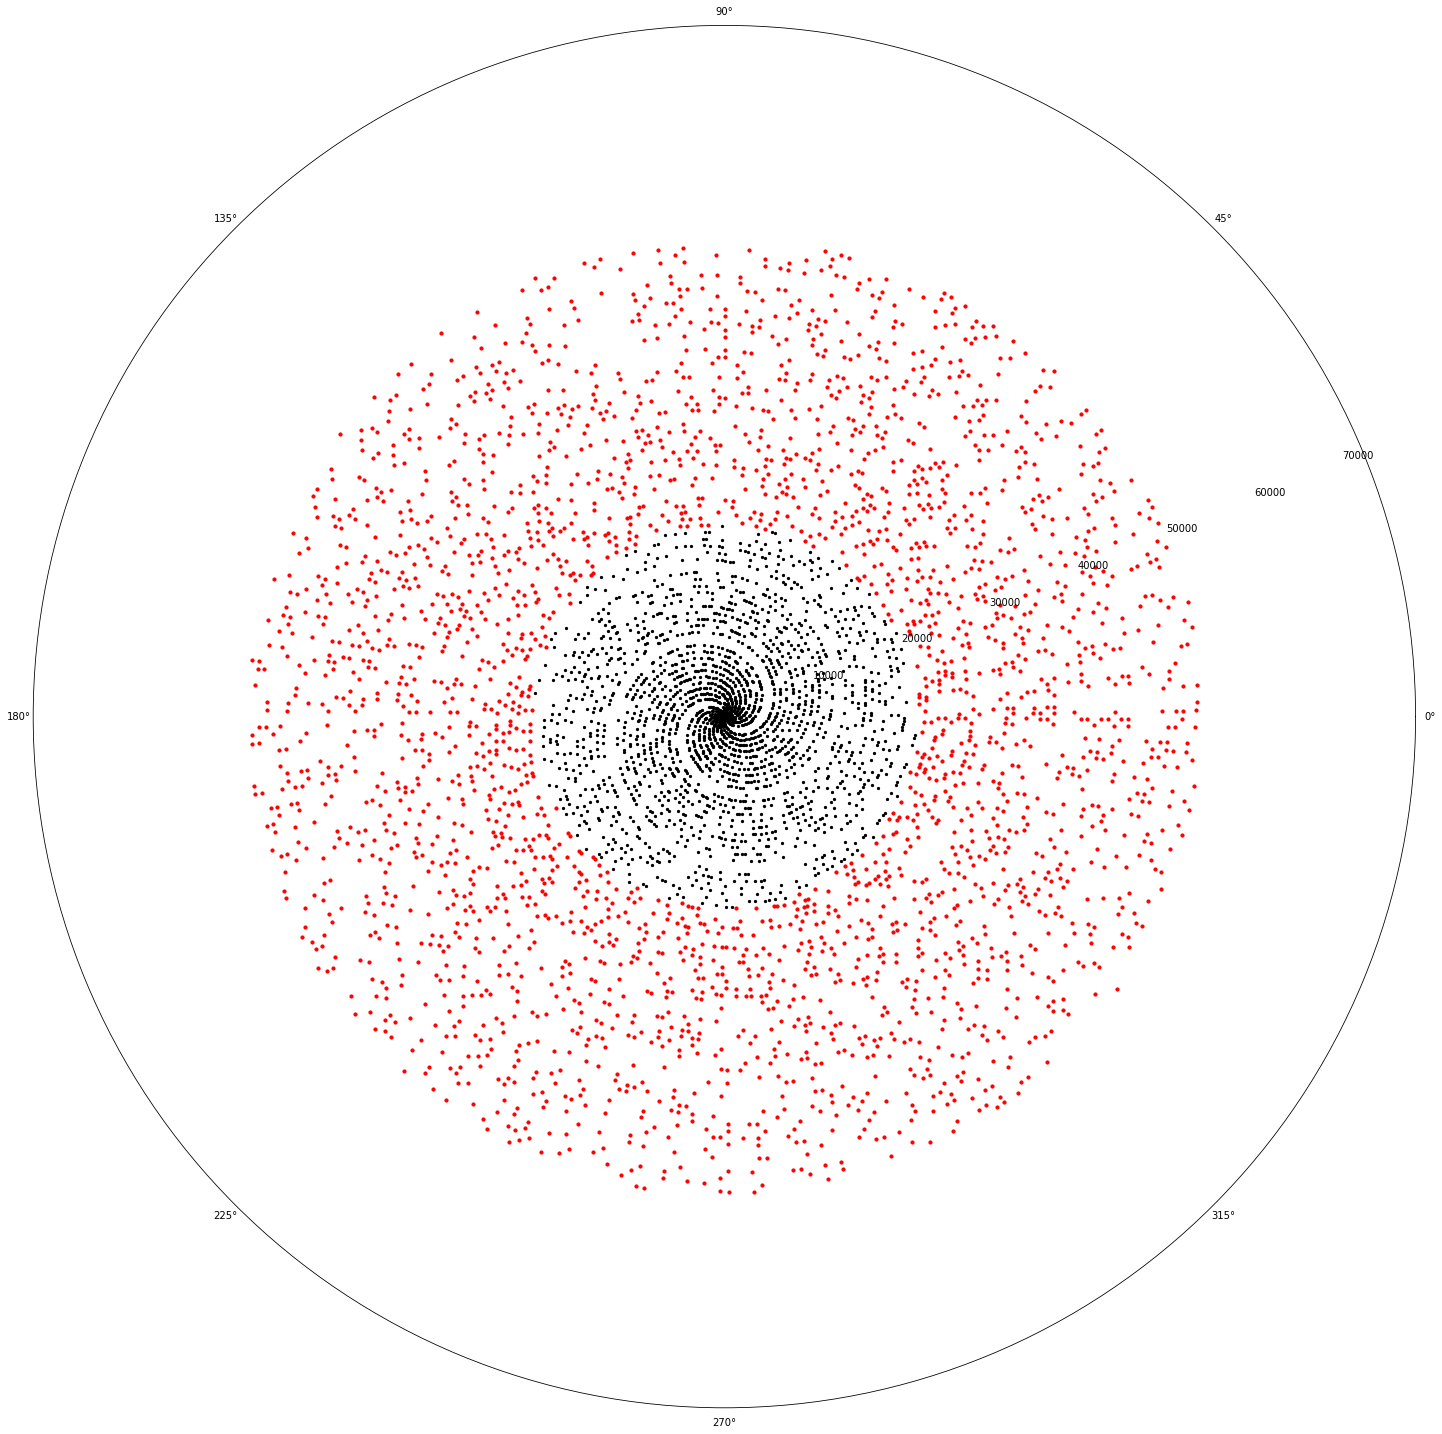

In [260]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.arange(-180.0,190.0,10)
x1=np.array(s)
R1 = np.array(s)
x2=np.array(bb)
R2 = np.array(bb)
xa = np.arange(10000,100000)
Ra = np.arange(10000,100000)
offset = 2.0

fig1 = plt.figure(figsize=(24,24))
ax1 = fig1.add_axes([0.2,0.1,0.8,0.8],polar=True)
ax1.set_rmax(1)

# ax1.scatter(xa,Ra,s=5,c='blue')
ax1.scatter(x1,R1,s=5, c='black')
ax1.scatter(x2,R2,s=10,c='red')

ax1.grid(False)
